<a href="https://colab.research.google.com/github/CVerka/Homework/blob/main/Homework7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.utils import plot_model
from IPython.display import Image

In [13]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
#exploration
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


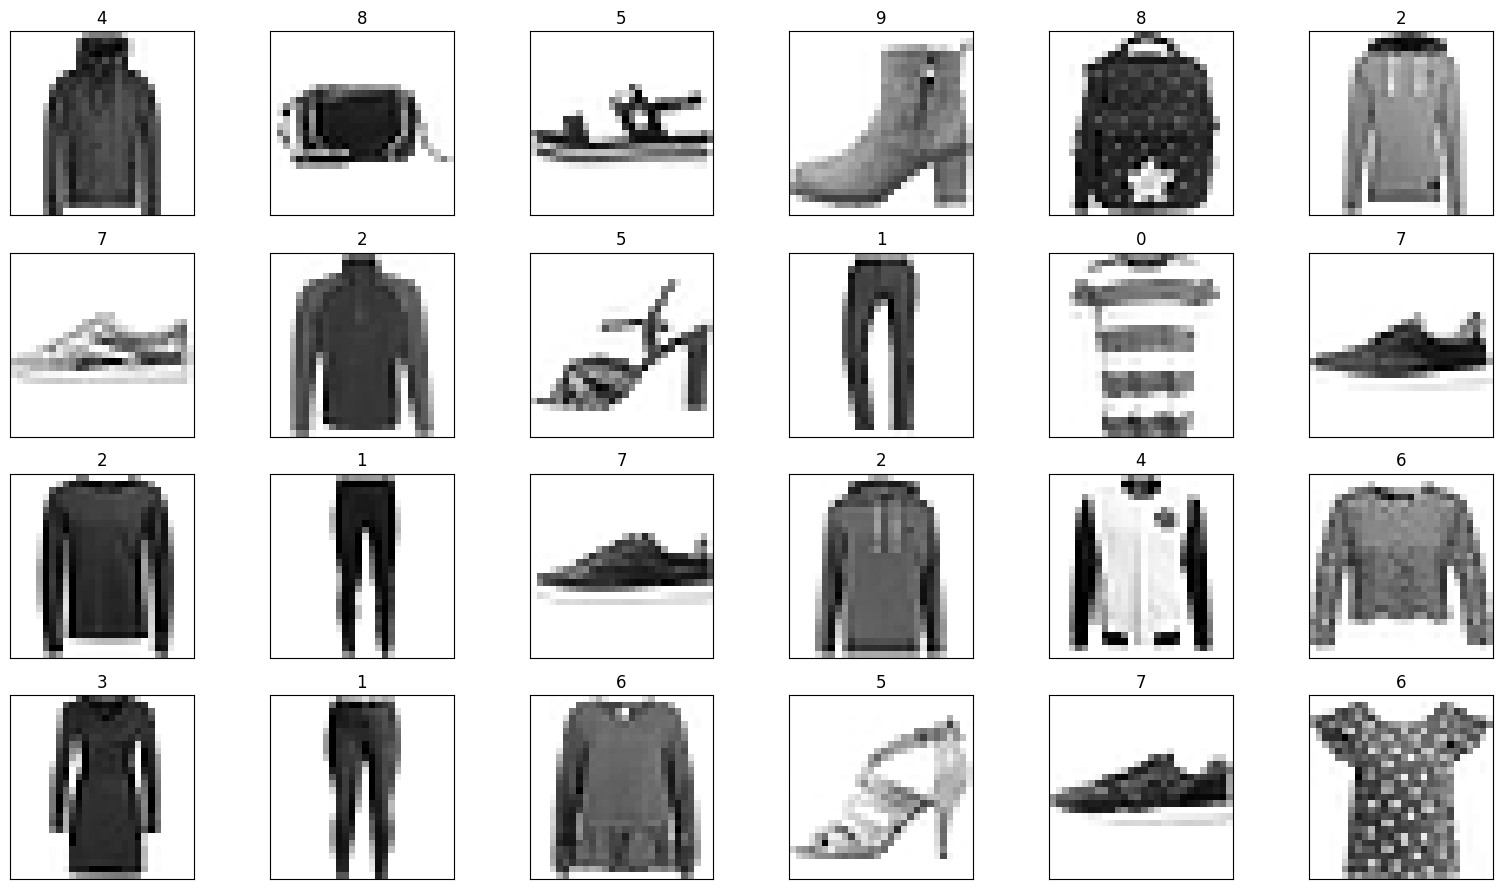

In [14]:
#visualization
index = np.random.choice(np.arange(len(X_train)),24,replace=False)
figures, axes = plt.subplots(nrows=4, ncols=6, figsize=(16,9))
for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)
plt.tight_layout()

In [15]:
#reshaping data
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [26]:
cnn = Sequential()
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dense(10, activation='softmax'))
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       1,384,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,386,506 (5.29 MB)

 Trainable params: 1,386,506 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

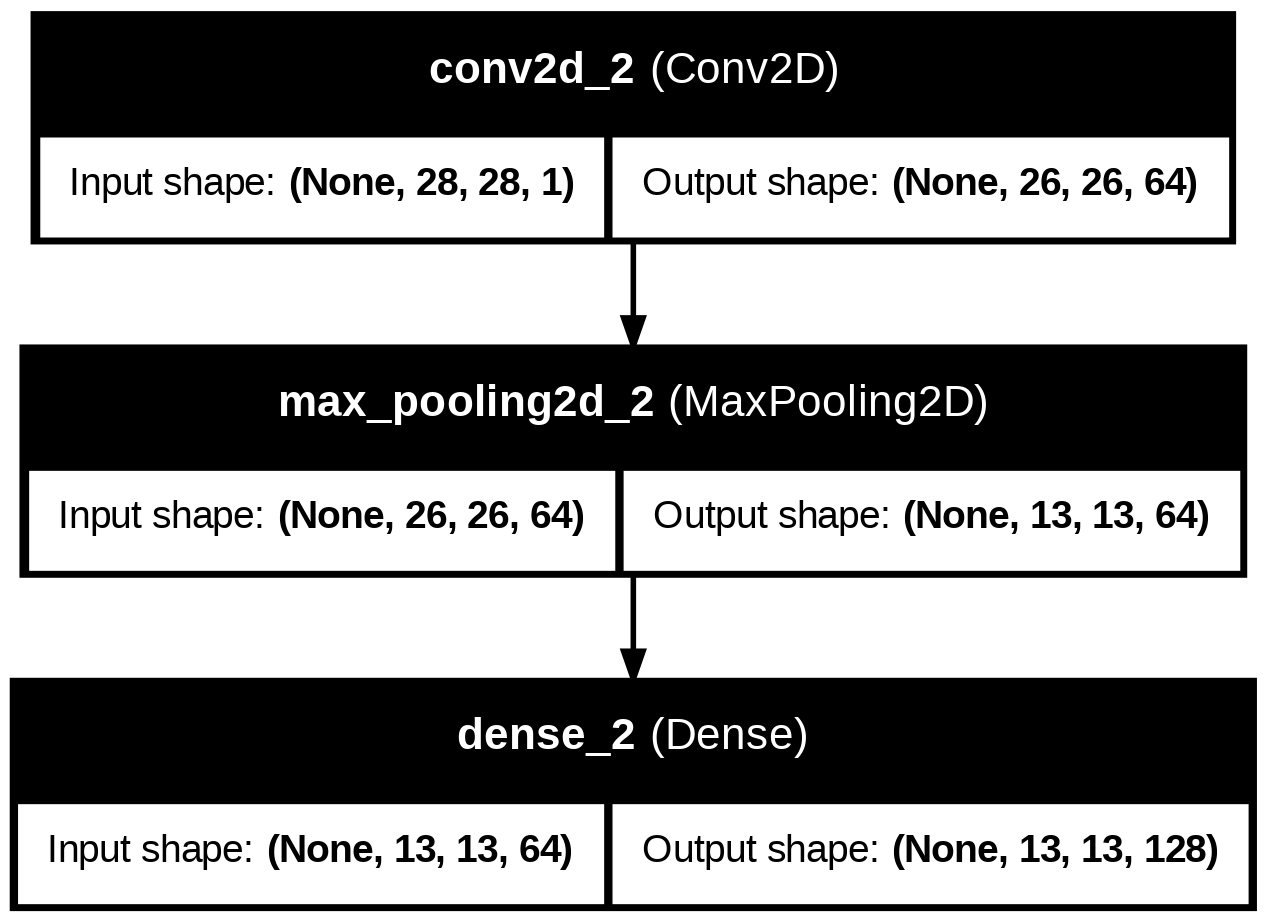

In [8]:
plot_model(cnn, to_file='cnn.png', show_shapes=True, show_layer_names=True)
Image(filename='cnn.png')

In [28]:

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn.fit(X_train, y_train, batch_size=64, epochs=5, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 65s 76ms/step - accuracy: 0.8000 - loss: 0.5663 - val_accuracy: 0.8915 - val_loss: 0.3037
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 64s 76ms/step - accuracy: 0.8985 - loss: 0.2844 - val_accuracy: 0.9028 - val_loss: 0.2704
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 55s 66ms/step - accuracy: 0.9174 - loss: 0.2290 - val_accuracy: 0.9095 - val_loss: 0.2521
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 74s 88ms/step - accuracy: 0.9280 - loss: 0.1928 - val_accuracy: 0.9123 - val_loss: 0.2501
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 67s 70ms/step - accuracy: 0.9400 - loss: 0.1635 - val_accuracy: 0.9078 - val_loss: 0.2575


In [29]:
#accuracy
loss, accuracy = cnn.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9053 - loss: 0.2741
Test loss: 0.2635078430175781
Test accuracy: 0.907800018787384


In [32]:
#probabilities
predictions = cnn.predict(X_test)
for index, probability in enumerate(predictions[0]):
    print(f'{index}. {probability:.10%}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
0. 0.0002478601%
1. 0.0000006565%
2. 0.0008344585%
3. 0.0000182779%
4. 0.0000187000%
5. 0.0128560889%
6. 0.0002003774%
7. 0.2342815744%
8. 0.0037130485%
9. 99.7478306293%


In [34]:
#incorrect predictions
images = X_test.reshape((10000, 28, 28))
incorrect_predictions =[]
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    if predicted != expected:
        incorrect_predictions.append((i,images[i], predicted, expected))
len(incorrect_predictions)

922

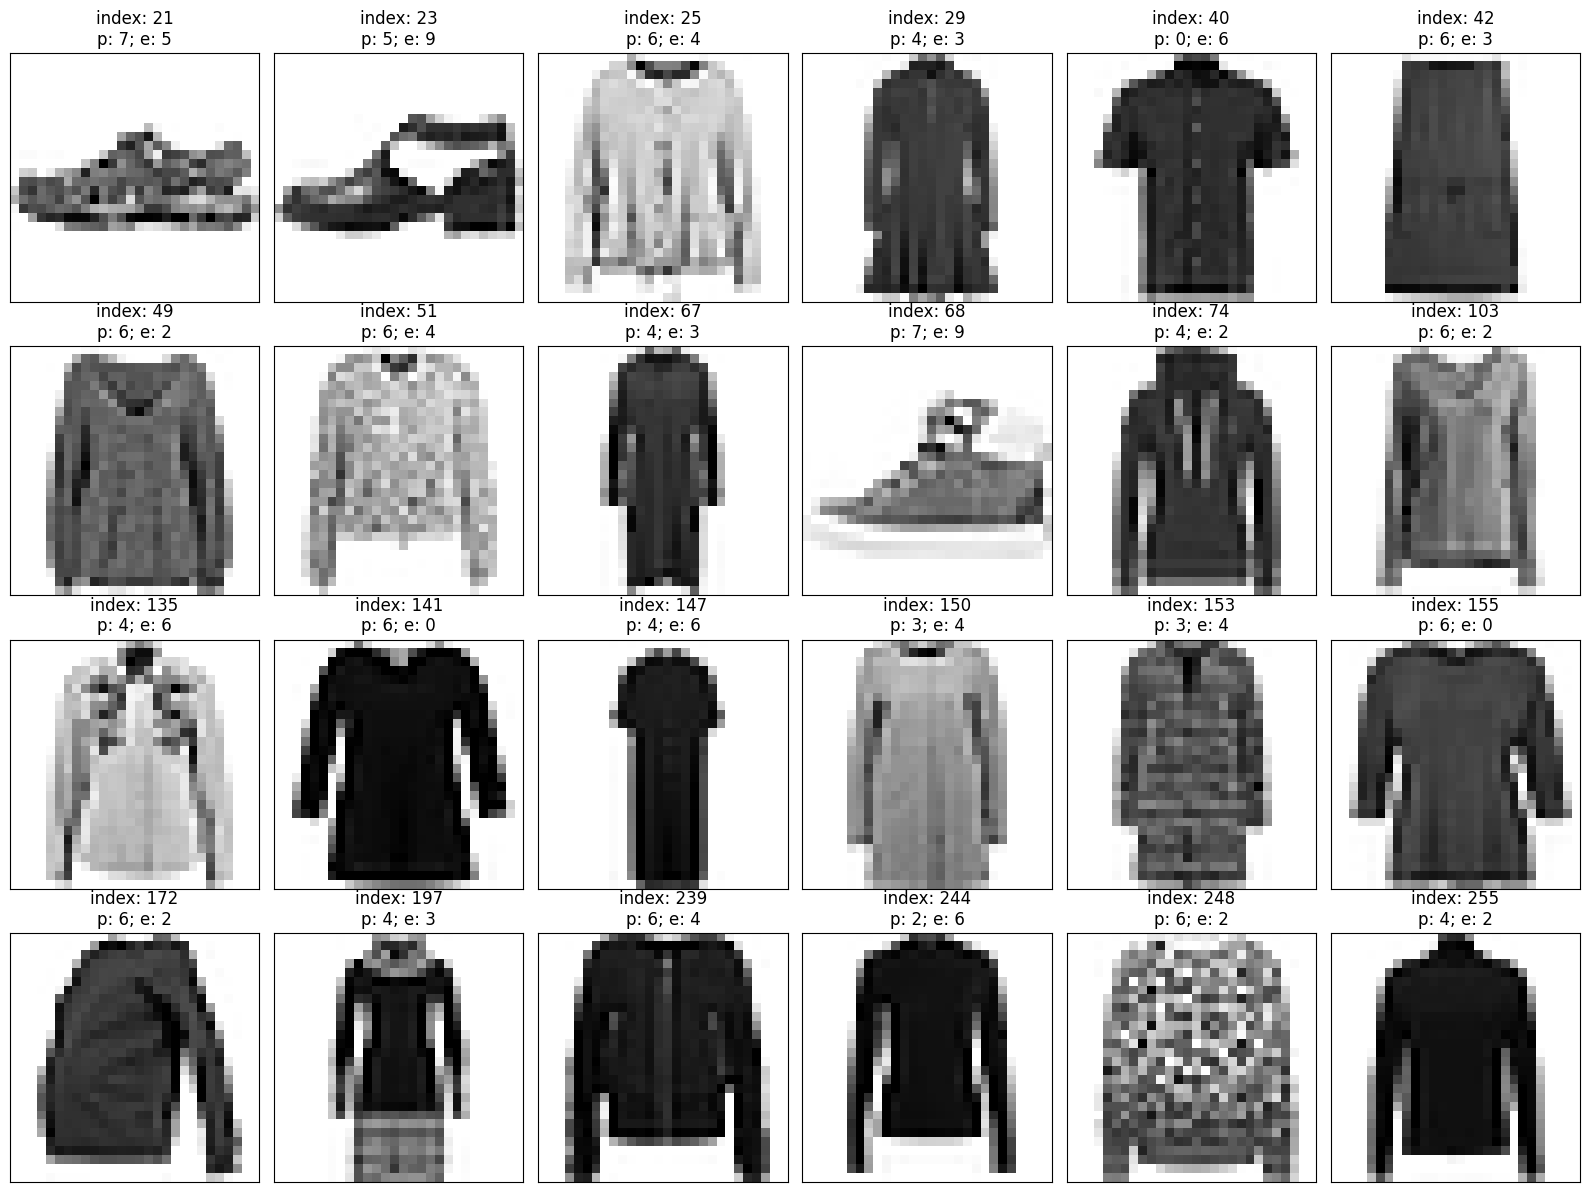

In [35]:
#incorrect prediction images
figures, axes = plt.subplots(nrows=4, ncols=6, figsize=(16,12))
for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [37]:
def display_probabilities(predictions):
    for index, probability in enumerate(predictions[0]):
        print(f'{index}. {probability:.10%}')
display_probabilities(predictions)

0. 0.0002478601%
1. 0.0000006565%
2. 0.0008344585%
3. 0.0000182779%
4. 0.0000187000%
5. 0.0128560889%
6. 0.0002003774%
7. 0.2342815744%
8. 0.0037130485%
9. 99.7478306293%


In [ ]:
#16.1 - The model performs well, but has a longer training time then MNIST
#16.4 - After adding an aditional dense layer the accuracy was about the same but each epoch required about an additional 15 seconds to complete